In [3]:
import os

In [4]:
data_dir='C:\\Users\\lukas\\Desktop\\cell_images'

In [5]:
os.listdir(data_dir)

['test', 'train']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from matplotlib.image import imread

In [8]:
test_path=data_dir+'\\test\\'
train_path=data_dir+'\\train\\'

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [13]:
para_cell=train_path+'parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [14]:
imread(para_cell).shape

(148, 142, 3)

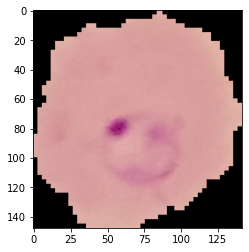

In [15]:
plt.imshow(imread(para_cell))

In [16]:
uninfected_cell=train_path+'uninfected'+'\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
imread(uninfected_cell).shape

(139, 160, 3)

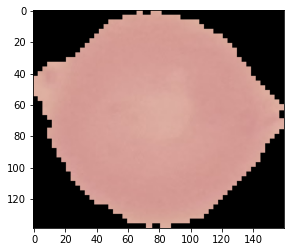

In [18]:
plt.imshow(imread(uninfected_cell))

In [19]:
len(os.listdir(train_path+'parasitized'))

12480

In [20]:
len(os.listdir(train_path+'uninfected'))

12480

In [21]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

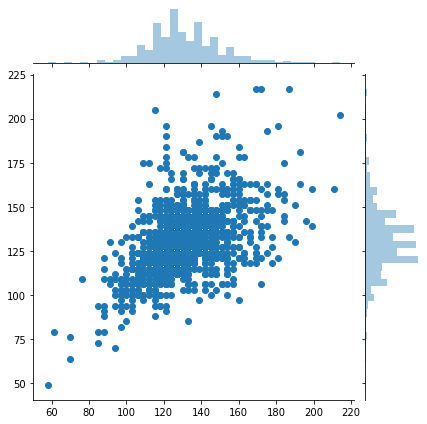

In [22]:
sns.jointplot(dim1,dim2)

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

In [25]:
image_shape=(130,130,3)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [28]:
imread(para_cell).max()

0.9098039

In [29]:
image_gen= ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')#verificar o valor maximo e fazer rescale=1/255

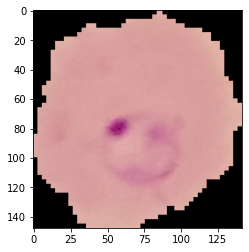

In [30]:
para_img=imread(para_cell)
plt.imshow(para_img)

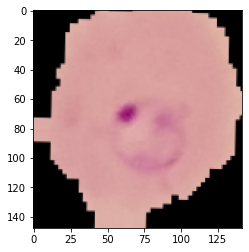

In [31]:
plt.imshow(image_gen.random_transform(para_img))

In [32]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [34]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(124, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [38]:
batch_size=16

In [39]:
train_image_gen=image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [40]:
test_image_gen=image_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=False) 

Found 2600 images belonging to 2 classes.


In [41]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [42]:
results=model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/20
  42/1560 [..............................] - ETA: 11:14 - loss: 6.8168 - acc: 0.4970

KeyboardInterrupt: 

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
metrics[['acc','val_acc']].plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred =model.predict_generator(test_image_gen)

In [ ]:
predictions = pred> 0.5

In [ ]:
predictions

In [ ]:
test_image_gen.classes

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
my_image = image.load_img(para_cell,target_size=image_shape)

In [ ]:
my_image

In [ ]:
model.summary()